Exercise 1


,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...
2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


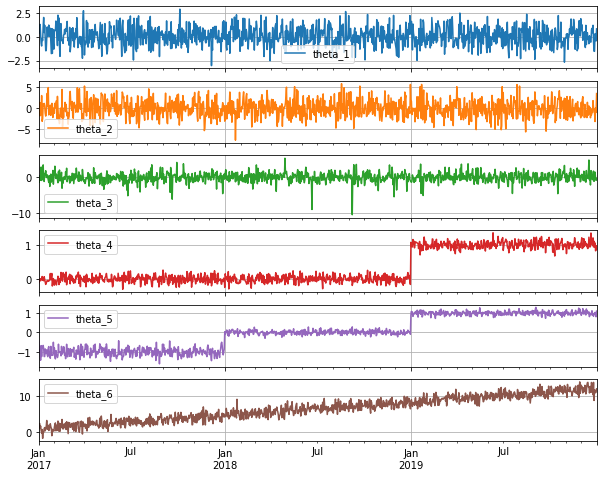

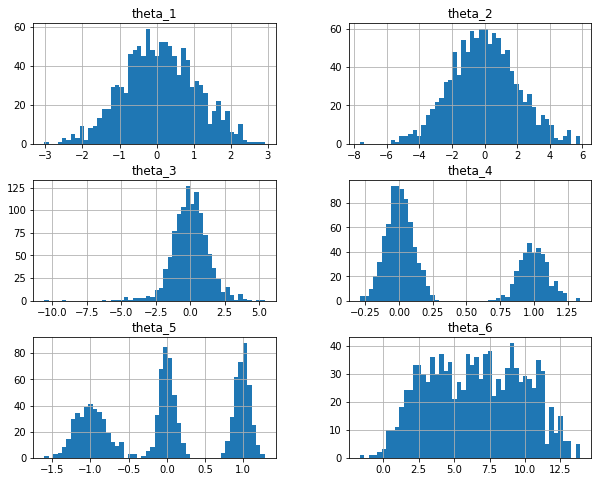

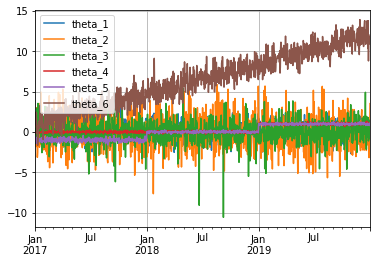

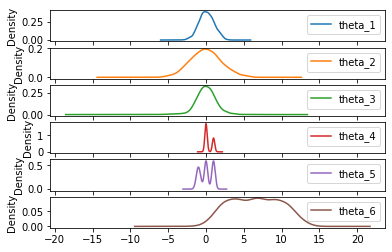

In [4]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


class VisualizeData:

    def __init__(self, path_to_csv_file: str, flag_2018: bool = False):
        self.path_to_csv_file = path_to_csv_file
        self.flag_2018 = flag_2018
        self.data = None
        self.data_2018 = None

    def set_first_as_index(self):
        self.data = pd.read_csv(self.path_to_csv_file, index_col=0, parse_dates=True)
        if self.flag_2018:
            self.data_2018 = self.data.loc['2018'][['theta_1', 'theta_2', 'theta_3', 'theta_4']]
            display(self.data_2018)
        else:
            display(self.data)

    def plot_data_as_time_series(self):
        if self.flag_2018:
            self.data_2018.plot(subplots=True, figsize=(10,8), grid=True)
        else:
            self.data.plot(subplots=True, figsize=(10,8), grid=True)
        plt.legend(loc='best')
        plt.show(True)

    def plot_histograms(self):
        if self.flag_2018:
            self.data_2018.hist(bins=20, figsize=(10,8), grid=True)
        else:
            self.data.hist(bins=50, figsize=(10,8), grid=True)
        plt.show(True)

    def all_theta_columns_on_single_plot(self):
        if self.flag_2018:
            self.data_2018.plot(grid=True)
        else:
            self.data.plot(grid=True)
        plt.show(True)

    def plot_KDE(self):
        if self.flag_2018:
            self.data_2018.plot.density(subplots=True)
        else:
            self.data.plot.density(subplots=True)
        plt.show(True)

    def all_plots(self):
        self.set_first_as_index()
        self.plot_data_as_time_series()
        self.plot_histograms()
        self.all_theta_columns_on_single_plot()
        self.plot_KDE()

if __name__ == '__main__':
    path = 'Data1.csv'
    print('Exercise 1')
    visualization_object = VisualizeData(path)
    visualization_object.all_plots()

YEAR 2018


,theta_1,theta_2,theta_3,theta_4
2018-01-01,0.682693,-3.091767,-0.475717,-0.238530
2018-01-02,-0.283107,-0.979955,1.233933,0.158031
2018-01-03,1.572221,-2.033528,2.196317,0.041347
2018-01-04,-1.042981,0.651530,1.060125,0.064832
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025
...,...,...,...,...
2018-12-27,0.473556,-0.651265,-0.523058,0.076798
2018-12-28,1.433117,0.325632,0.905920,0.028891
2018-12-29,0.285428,-0.476290,1.082404,0.111482
2018-12-30,2.249273,-1.233575,-0.666277,-0.080878


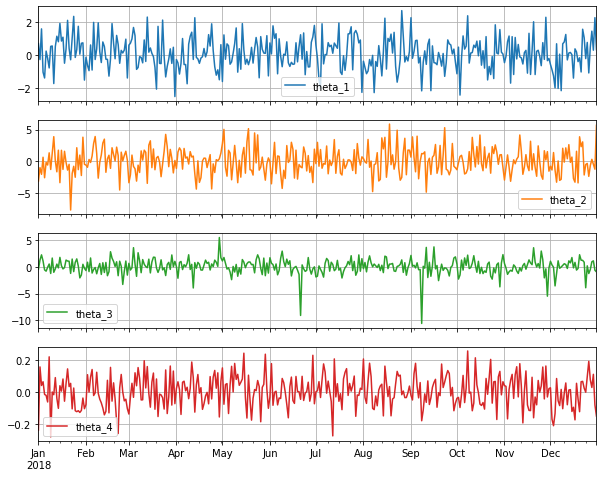

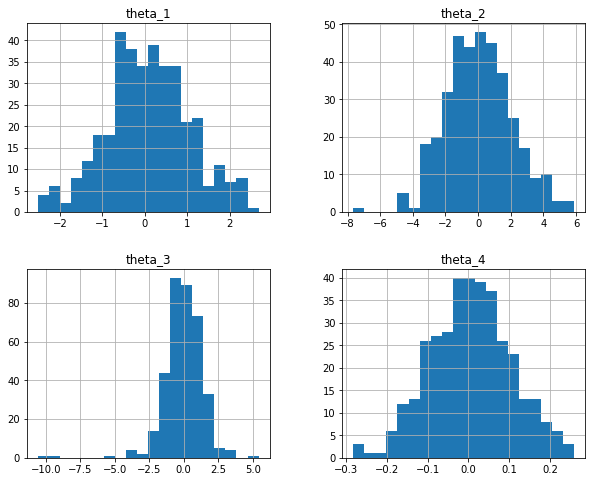

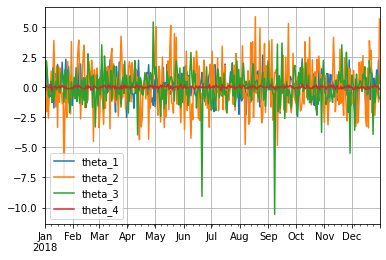

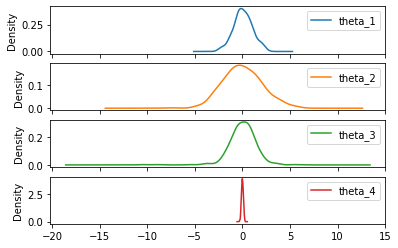

In [5]:
print('YEAR 2018')
visualization_object_2018 = VisualizeData(path, flag_2018=True)
visualization_object_2018.all_plots()

Exercise 2 


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


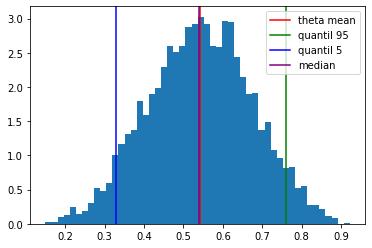

In [6]:
print('Exercise 2 ')
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
import cmdstanpy


dataset = {
    'N': 11,
    'y': [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0]
}
stan_model = CmdStanModel(stan_file='bern_1.stan')

samples = stan_model.sample(data=dataset)
theta = samples.stan_variable('theta')

data_frame = samples.summary()
df_theta = data_frame.loc['theta']
median = df_theta['50%']
quantil_5 = df_theta['5%']
quantil_95 = df_theta['95%']

plt.hist(theta, bins=50, density=True)
plt.axvline(theta.mean(), color='red')
plt.axvline(quantil_95, color='green')
plt.axvline(quantil_5, color='blue')
plt.axvline(median, color='purple')
plt.legend(['theta mean', 'quantil 95', 'quantil 5', 'median'])
plt.show()
